<center>
<img src="https://i.ibb.co/ZVRt2f7/logo.png" alt="logo" border="0" width=800>


---
## 01. An Image Classification Neural Network


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will train a neural network to classify images.

---

---

## The Dataset

We will use two sets of synthetic images to train and to test a neural network. The training set includes 5000 synthetic images with a size of 28pixels by 28 pixels, showing a black background and a random number of 'stars' and also includes a set of targets with the number of stars in each image. The test set includes 1000 of images with the corresponding targets. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


train_images = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Image Classification NN/star_data/star_image_train.npy")
train_labels = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Image Classification NN/star_data/star_label_train.npy")

test_images = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Image Classification NN/star_data/star_image_test.npy")
test_labels = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Image Classification NN/star_data/star_label_test.npy")

In [2]:
print(train_images.shape)
print(train_labels.shape)

(5000, 28, 28)
(5000,)


In [ ]:
print(test_images.shape)
print(test_labels.shape)

(1000, 28, 28)
(1000,)


These images are already 'normalized', i.e. the entries in the array are numbers in the range [0,1],

In [4]:
train_images[413]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We can visualize some of the images in the trining set,

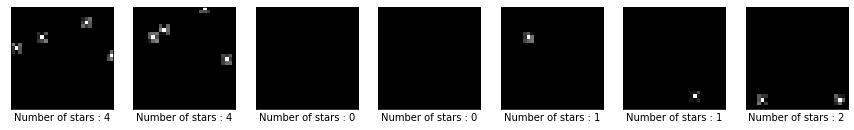

In [ ]:
fig, ax = plt.subplots(1,7, figsize=(15,7))

for i in range(7):    
    ax[i].imshow(train_images[i+5], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel(f'Number of stars : {train_labels[i+5]:.0f}')
plt.show()

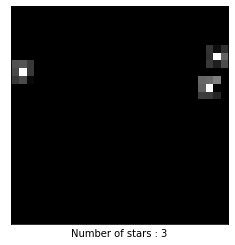

In [ ]:
def showImage(x,y,item):
  plt.figure()
  plt.imshow(x[item], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f'Number of stars : {y[item]:.0f}')
  plt.show()


showImage(train_images, train_labels, 2557)

## The Classification Neural Network

We want to train a neural network model that reads the data and classify these images according to the number of stars (targets). Therefore we need to declare the following:

- An input layer that reads the data in the image. This will be a 'Flatten' layer (it will take the image of size 28 by 28 and will convert it into a flat array with 784 entries). Therefore, we need 784 neurons in this layer.

- We will use 2 hidden dense layer with 50 neurons and a ReLU activation (ReLU will ignore negative values)

- Finally we will incorporate an output dense layer with 6 neurons (because the number of stars in the set goes from 0 to 5) and a 'softmax' activation function.

- The model will be a 'Sequential' neural network.

In [ ]:
import tensorflow as tf


# input layer: Type Flatten. The input is an image of 28x28 pixels with 1 channel
inputlyr = tf.keras.layers.Flatten(input_shape=(28,28,1))

# hidden layers with 50 neurons and relu
hdnlyr01 = tf.keras.layers.Dense(units=50, activation=tf.nn.relu)
hdnlyr02 = tf.keras.layers.Dense(units=50, activation=tf.nn.relu)

# output layer
outlyr = tf.keras.layers.Dense(units=6, activation=tf.nn.softmax)


model = tf.keras.Sequential([inputlyr, hdnlyr01, hdnlyr02, outlyr])


In order to compile the neural network we will include the [ADAM](https://keras.io/api/optimizers/adam/) optimizer, the [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) loss function and the [accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) metric.

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

### The CategoricalCrossentropy and the SparseCategoricalCrossentropy loss functions 

The [CategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) and the [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class) loss functions are used to measure the  cost of a classification model.

In order to use these function, the algorithm may use and encoding to represent the targets. For example, if one has some categorical targets, they are first represented as integer values:

- TargetA ---> 0 
- TargetB ---> 1
- TargetC ---> 2
- TargetD ---> 3
...

Under this encoding, we can use the 'sparsecategorical_crossentropy' function which is defined as

\begin{equation}
J(w) = -\sum_{i=1}^N y_i\log (y_i^p) 
\end{equation}



Another representation is obtained by using the **one-hot encoding**, which is based on the use of binary vectors. In this case each integer assigned to the categorical targets is represented as a binary vector, that is all zero values except the index of the integer which is marked with a 1. For example:

- TargetA ---> 0  ---> [1 0 0 0]
- TargetB ---> 1  ---> [0 1 0 0]
- TargetC ---> 2  ---> [0 0 1 0]
- TargetD ---> 3  ---> [0 0 0 1]
...

Under this encoding, we can use the 'categorical_crossentropy' function which is defined as before

\begin{equation}
J(w) = -\sum_{i=1}^N y_i \log (y_i^p) 
\end{equation}




### Metrics

A metric is a function that is used to judge the performance of the model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model (In fact, one can use any loss function as a metric).

Keras includes many [metrics](https://keras.io/api/metrics/):

**Accuracy metrics**
- Accuracy class
- BinaryAccuracy class
- CategoricalAccuracy class
- SparseCategoricalAccuracy class
- TopKCategoricalAccuracy class
- SparseTopKCategoricalAccuracy class

**Probabilistic metrics**
- BinaryCrossentropy class
- CategoricalCrossentropy class
- SparseCategoricalCrossentropy class
- KLDivergence class
- Poisson class

**Regression metrics**
- MeanSquaredError class
- RootMeanSquaredError class
- MeanAbsoluteError class
- MeanAbsolutePercentageError class
- MeanSquaredLogarithmicError class
- CosineSimilarity class
- LogCoshError class

**Classification metrics based on True/False positives & negatives**
- AUC class
- Precision class
- Recall class
- TruePositives class
- TrueNegatives class
- FalsePositives class
- FalseNegatives class
- PrecisionAtRecall class
- SensitivityAtSpecificity class
- SpecificityAtSensitivity class
- Image segmentation metrics
- MeanIoU class
- Hinge metrics for "maximum-margin" classification
- Hinge class
- SquaredHinge class
- CategoricalHinge class

In [ ]:
# print model summary before training
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 6)                 306       
                                                                 
Total params: 42,106
Trainable params: 42,106
Non-trainable params: 0
_________________________________________________________________


Now we will train the model using the train-sets and 5 epochs.

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
157/157 [==============================] - 1s 2ms/step - loss: 1.5401 - accuracy: 0.2516
Epoch 2/5
157/157 [==============================] - 0s 2ms/step - loss: 0.8466 - accuracy: 0.7658
Epoch 3/5
157/157 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8914
Epoch 4/5
157/157 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.9272
Epoch 5/5
157/157 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9468


Note that the training gives an accuracy (with the training set) of 0.9430 and a final cost function fo 0.2283

---
## Testing the Model

Now we will use the test subsets to probe the model. Using the '.evaluate()' method, we obtain the accuracy of the model (using the metric defined above),

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

32/32 - 0s - loss: 0.3447 - accuracy: 0.8540 - 142ms/epoch - 4ms/step

Test accuracy: 0.8539999723434448


Note that the trained model have an accuracy of 0.85 on the test set.

Using the '.predict()' method we will obtain the predictions for the test set,

In [ ]:
predictions= model.predict(test_images)

32/32 [==============================] - 0s 931us/step


The result for a particular sample is a collection of probabilities associated with each of the possible targets (number of stars from 0 to 5),

In [ ]:
predictions[18]

array([3.1761597e-03, 9.1313159e-01, 8.3340317e-02, 3.5128411e-04,
       8.0465992e-07, 5.5277494e-10], dtype=float32)

Since we use the activation function 'softmax' in the output layer, the sum of all the probabilities for a single sample is 1,

In [ ]:
sum(predictions[18])

1.0000001606792648

Using the function 'np.argmax()' we obtain the index corresponding to the maximum probability,

In [ ]:
np.argmax(predictions[18])


1

---
## Visualization of the Results

In order to visualize the result of the mode, we define two plotting functions. The first one shows the image together with the predicted value. The second one shows the probabilities of all the targets for the given sample.

In [ ]:
def plot_image(i, p=predictions, tar = test_labels, image = test_images):
  target, img = tar[i], image[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')

  pred_target = np.argmax(p[i])
  if pred_target == target:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted: {} ({:2.0f}%)   True:{}".format(pred_target,
                                100*np.max(p),
                                target),
                                color=color)

def plot_value_array(i, p=predictions, tar = test_labels):
  target = tar[i]
  #plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), p[i], color="#777777")
  plt.ylim([0, 1])
  pred_target = np.argmax(p[i])

  thisplot[pred_target].set_color('red')
  thisplot[target].set_color('blue')

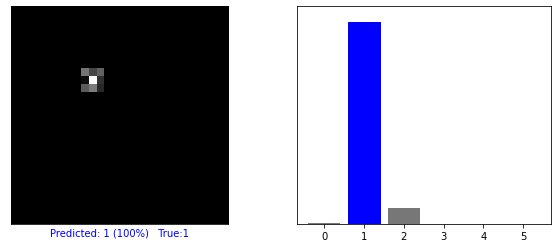

In [ ]:
i = 413

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i)
plt.subplot(1,2,2)
plot_value_array(i)
plt.show()